In [2]:
from bs4 import BeautifulSoup
import requests
import re
from urllib.request import quote, unquote

In [3]:
def get_html(url):
    s = requests.Session()
    s.headers['User-Agent'] = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1847.131 Safari/537.36'
    html = s.get(url)
    html.encoding='utf-8'
    html_content = html.text                #发送请求
    #print("### Handling <" + url + ">")
    return html_content

In [4]:
url = 'https://baike.baidu.com/item/北京地铁/408485'
s = requests.Session()
s.headers['User-Agent'] = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1847.131 Safari/537.36'
html = s.get(url)
html.encoding='utf-8'
html_content = html.text
p1 = re.compile(r"<a target=_blank href=\"(.+?)\">.+?</a></td><td width=\"172\" align=\"left\" valign=\"top\"")
url_extra = p1.findall(html_content)
url_list = []
for url in url_extra:
    new_url = 'https://baike.baidu.com'+(url)
    url_list = url_list +[new_url]
url_list

['https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%816%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%817%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%819%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF',
 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8114%E5%8F%B7%E7%BA%BF',
 'https://baike.ba

In [5]:
url_list[0]

'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF'

In [101]:
#extra lines info from web
def get_lines_info_with_bs(url_list):
    lines_info = []
    for line in url_list:
        url = line
        html = get_html(url)     #获取html页面
        bsobj = BeautifulSoup(html, "lxml")       #用lxml解析html
        tbody = bsobj.findAll('table')    #查找到显示线路信息的表格
        lines_regexp = re.compile(r"</th></tr><tr><th>")
        new_key = unquote(line, encoding='utf-8')
        new_key = new_key[29:]
        for table in tbody:
            if (table.caption) and ("相邻站间距信息统计表" in table.caption.text):
                bsobj = BeautifulSoup(str(table))       
                station_info = bsobj.findAll('tr')
                #lines = bsobj.findAll(text=lines_regexp)
                #distance_info = bsobj.findAll('\d+')
                for info in station_info[1:]:
                    bsobj = BeautifulSoup(str(info))       
                    stations = bsobj.findAll('th')
                    distances = bsobj.findAll('td')
                    for i in range(len(stations)):
                        line_station = stations[i].text.split('——')
                        distance = re.findall("\d+",distances[i].text)
                        lines_info.append([line_station]+distance+[new_key])
    return lines_info

In [102]:
#extra lines info from web
def get_line_info_withre(url_list):
    lines_info = dict()
    for line in url_list:
        url = line
        #html_content = html.text
        html_content = get_one_line_time(url)
        p1 = re.compile(r"<tr><th.*?>(.+?)</th><td.*?>(.+?)</td><td.*?>上行/下行</td></tr>")
        new_key = unquote(line, encoding='utf-8')
        new_key = new_key[29:]
        print(str(html_content[2]))
        for table in html_content:
            regexp = p1.findall(str(table))
            #print(table.text)
            if regexp:
                lines_info[new_key] = regexp
        return lines_info

In [103]:
def get_station_connection_info(lines_info):
    connection = []
    for line in lines_info:
        connection = connection+[line[0]]
    return connection

In [104]:
lines_info = get_lines_info_with_bs(url_list)

D:\Program Files (x86)\Anaconda\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file D:\Program Files (x86)\Anaconda\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [108]:
import networkx as nx
import matplotlib
%matplotlib inline
lines_connection = get_station_connection_info(lines_info)
lines_connection_graph = nx.Graph(lines_connection)

D:\Program Files (x86)\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
D:\Program Files (x86)\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
D:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
D:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

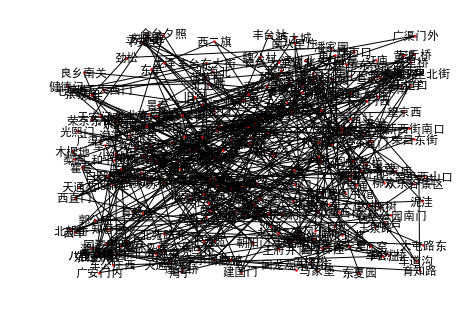

In [135]:
nx.draw(lines_connection_graph, pos = nx.random_layout (lines_connection_graph),with_labels=True, node_size=2)

In [278]:
def get_succsssors(froninter, graph):
    return graph[froninter]

def is_goal(predicate):
    def _predicate(condition):
        return predicate(condition)
    return _predicate

def search_destination(graph, lines_info,start, get_succsssors, is_goal_predicate, strategy_func):
    pathes = [[start]]
    seen = set()
    chosen_pathes = []
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        if frontier in seen: continue
        for city in get_succsssors(frontier, graph):
            if city in path: continue # remove the loop
            new_path = path + [city]
            pathes.append(new_path)
            if is_goal_predicate(city): 
                chosen_pathes.append(new_path)
        seen.add(frontier)
    pathes = get_path_line_distance(chosen_pathes,lines_info)
    return strategy_func(paths)
def sort_pathes(pathes, func):
    return sorted(pathes, key=func)

def comprehensive_sort(pathes):
    return sort_pathes(pathes, lambda p: (len(p['path_name'])+p['path_line_num']))

def mini_change_station(pathes):
    return sort_pathes(pathes, lambda p : p['path_line_num'])

def min_distance(pathes):
    return sort_pathes(pathes, lambda p : p['path_distance'])
def min_time(pathes):
    return sort_pathes(pathes, lambda p : len(p['path_name']))
def all_paths_info(pathes):
    return pathes

In [264]:
def get_path_line_distance(paths,lines_info):
    paths_info = []
    for path in paths:
        path_info = {}
        distance =0
        line_num = set()
        for i in range((len(path)-1)):
            cur_path = path[i:i+2]
            for lines in lines_info:
                if set(cur_path) == set(lines[0]):
                    distance+=int(lines[1])
                    line_num.add(lines[2])
        path_info['path_name'] = path
        path_info['path_distance'] = distance
        path_info['path_line_num'] = len(line_num)
        path_info['path_line_info'] = line_num
        paths_info.append(path_info)
    return(paths_info)

In [280]:
paths = search_destination(lines_connection_graph,lines_info, '魏公村', get_succsssors, lambda n: n == '车公庄', all_paths_info)
print("\n all:%s"%(paths))
paths = search_destination(lines_connection_graph,lines_info, '魏公村', get_succsssors, lambda n: n == '车公庄', min_distance)
print("\nmin_distance:%s"%(paths[0]))
paths = search_destination(lines_connection_graph,lines_info, '魏公村', get_succsssors, lambda n: n == '车公庄', mini_change_station)
print("\n mini_change_station:%s"%(paths[0]))
paths = search_destination(lines_connection_graph,lines_info, '魏公村', get_succsssors, lambda n: n == '车公庄', min_time)
print("\nmin_time:%s"%(paths[0]))
paths = search_destination(lines_connection_graph,lines_info, '魏公村', get_succsssors, lambda n: n == '车公庄', comprehensive_sort)
print("\ncomprehensive_sort:%s"%(paths[0]))


 all:[{'path_name': ['魏公村', '国家图书馆', '动物园', '西直门', '车公庄'], 'path_distance': 5525, 'path_line_num': 2, 'path_line_info': {'北京地铁4号线', '北京地铁2号线'}}, {'path_name': ['魏公村', '国家图书馆', '白石桥南', '车公庄西', '车公庄'], 'path_distance': 5305, 'path_line_num': 3, 'path_line_info': {'北京地铁4号线', '北京地铁6号线', '北京地铁9号线'}}]

min_distance:{'path_name': ['魏公村', '国家图书馆', '白石桥南', '车公庄西', '车公庄'], 'path_distance': 5305, 'path_line_num': 3, 'path_line_info': {'北京地铁4号线', '北京地铁6号线', '北京地铁9号线'}}

 mini_change_station:{'path_name': ['魏公村', '国家图书馆', '动物园', '西直门', '车公庄'], 'path_distance': 5525, 'path_line_num': 2, 'path_line_info': {'北京地铁4号线', '北京地铁2号线'}}

min_time:{'path_name': ['魏公村', '国家图书馆', '动物园', '西直门', '车公庄'], 'path_distance': 5525, 'path_line_num': 2, 'path_line_info': {'北京地铁4号线', '北京地铁2号线'}}

comprehensive_sort:{'path_name': ['魏公村', '国家图书馆', '动物园', '西直门', '车公庄'], 'path_distance': 5525, 'path_line_num': 2, 'path_line_info': {'北京地铁4号线', '北京地铁2号线'}}


In [ ]:
# test for re
tt = '''<table log-set-param="table_view" width="658" class="ten"><caption>10号线相邻站间距信息统计表</caption><tr><th>起始/终到车站</th><th>区间距离</th><th>方向</th></tr><tr><th>巴沟——苏州街</th><td width="198" align="middle" valign="center">1110米</td><td width="198" align="middle" valign="center">上行/下行</td></tr>'''
rr = re.compile(r".*<tr><th.*?>(.+?)</th><td.*?>(.+?)</td><td.*?>上行/下行</td></tr>")
rr.findall(tt)